# Simple statistics with SciPy

* Scipy 是基於 Numpy 的，而且是使用 Numpy arrays 和 data types 來運算
* Scipy 把 Numpy package 中所有的函數和一些 sub-packages 中的函數都 import 進去了
* Scipy 可以用 info 函數來查詢 Scipy 中的函數，`scipy.info(scipy.stats)`

In [0]:
import scipy as sp
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt

### 1. Descriptive statistics

In [51]:
# 依照 Gaussian 分佈產生 100 個隨機數
s = sp.randn(100) # 等同於 np.random.rand()
print(s)
print(len(s))

[ 0.52938103 -0.09459377  1.84488559  0.06911031 -0.34778344 -0.43147437
 -0.04641512  0.41539527  1.8804729   1.27142586  0.11699047  2.86744489
 -0.4492868  -0.42610017  1.26599673  0.83965535  0.02713078 -0.67304208
  0.76479593  0.29008339  1.83964519 -0.12727986  1.10304308 -0.31192835
 -0.37069099 -1.63392366 -0.35386133 -0.76992337 -0.8035798  -0.94719658
  1.04295013  0.32141104 -0.32043088  0.29476745  0.7866804  -0.13119471
 -0.30067816 -1.20182009  0.66957875  1.63513621  0.97712679 -0.43354064
 -0.05468621 -2.44221623 -0.47959051  1.81250179 -0.84708588 -0.50098096
 -0.14864684  1.09428145 -0.52627943 -1.91231827  0.97095346 -0.34250696
  1.39112973 -0.98878726 -0.73151105 -0.44014699  1.50875104 -0.27185587
 -1.28834341  0.83600586  0.03323268  0.81440392  0.64213786  1.20641108
  1.0675513   0.32768671 -0.52069361 -0.91351735  0.82813072  1.30984322
  0.49179892  0.51416015  1.50479844  0.67169395 -2.0653649  -0.37902653
 -2.41286409  0.4341435   0.59131832  0.00385816  0

In [52]:
# statistics
print('Mean: {0:8.6f}'.format(s.mean())) # 也可以用 sp.mean(s) 的方式
print('Mean: {0:8.6f}'.format(sp.mean(s)))

Mean: 0.104849
Mean: 0.104849


In [53]:
print('Min: {0:8.6f}'.format(s.min()))
print('Max: {0:8.6f}'.format(s.max()))

Min: -2.442216
Max: 2.867445


In [54]:
print('Variance: {0:8.6f}'.format(s.var())) # 也可以用 sp.var(s) 的方式
print('Variance: {0:8.6f}'.format(sp.var(s)))

Variance: 1.031978
Variance: 1.031978


* 計算 variance 時分母是使用母體的數目 N 
* `scipy.var(s, ddof=1)` 用 `ddof` 參數使分母變成樣本數目 `N - ddof`，預設 `ddof=0`

In [55]:
print('Variance with N in denominator = {0:8.6f}'.format(sp.var(s)))
print('Variance with N - 1 in demoninator = {0:8.6f}'.format(sp.var(s, ddof=1)))

Variance with N in denominator = 1.031978
Variance with N - 1 in demoninator = 1.042402


In [56]:
print('Std. deviation: {0:8.6f}'.format(s.std())) # 也可以用 sp.std(s) 的方式
print('Std. deviation: {0:8.6f}'.format(sp.std(s)))

Std. deviation: 1.015863
Std. deviation: 1.015863


In [57]:
print('Median: {0:8.6f}'.format(sp.median(s)))

Median: 0.051484


In [58]:
# scipy.stat 的 describe() 可以列出統計值
from scipy import stats

n, min_max, mean, var, skew, kurt = stats.describe(s)
print('Number of elements: {0:d}'.format(n))
print('Minimum: {0:8.6f}, Maximum: {1:8.6f}'.format(min_max[0], min_max[1]))
print('Mean: {0:8.6f}'.format(mean))
print('Variance: {0:8.6f}'.format(var)) # 這裡是用 N-1 當分母來算出來的值
print('Skew: {0:8.6f}'.format(skew))
print('Kurtosis: {0:8.6f}'.format(kurt))

Number of elements: 100
Minimum: -2.442216, Maximum: 2.867445
Mean: 0.104849
Variance: 1.042402
Skew: -0.095043
Kurtosis: -0.011009


### 2. Probability distributions
* 機率分佈函數放在 `scipy.stats` 裡面
* scipy 有 81 個連續和 10 個不連續的機率分佈函數，也有許多統計函數
* 函數的參數寫在 docstring 裡面方便查詢
    * 例如: 可以用 `help(stats.poisson)` 或用 `scipy.info(stats.poisson)` 來查詢
    * 在 iPython 中可以用 `stats.poisson?` 來查詢

In [59]:
# 產生一個 mean=3.5, std=2.0 的 Gaussian 分佈物件
n = stats.norm(loc=3.5, scale=2.0) # 先定義物件
print(n.rvs()) # 再依照剛才定義的高斯分佈產生隨機變數
print(stats.norm.rvs(loc=3.5, scale=2.0)) # 直接產生高斯分佈的隨機變數

0.7691988815867505
1.194428715210865


#### 2.1 PDF & PMF

* **pdf**: **probability density function**, 連續
* **pmf**: **probability mass function**, 不連續
* 例如
    * norm, chi2, t, uniform 是連續的機率分佈函數
    * binom, poisson 是不連續的機率分佈函數

In [60]:
# PDf of Gaussian of mean=0.0 and std. deviation=1.0 at 0.
print(stats.norm.pdf(0, loc=0.0, scale=1.0)) # 計算 x=0 時 N(0, 1) 是多少

0.3989422804014327


In [61]:
# 也可以傳入 list 來計算
print(stats.norm.pdf([-0.1, 0.0, 0.1], loc=0.0, scale=1.0))

[0.39695255 0.39894228 0.39695255]


In [62]:
# PMF of binomial distribution with p=0.5, trials n=10
tries = range(11) # 0 to 10
print(stats.binom.pmf(tries, 10, 0.5)) # 第一個參數就是 N 次試驗中幾次成功

[0.00097656 0.00976563 0.04394531 0.1171875  0.20507813 0.24609375
 0.20507813 0.1171875  0.04394531 0.00976563 0.00097656]


In [0]:
# 畫圖
import matplotlib.pyplot as plt
def binom_pmf(n=4, p=0.5):
    # There are n+1 possible number of 'successes': 0 to n.
    x = range(n + 1)
    y = stats.binom.pmf(x, n, p)
    plt.plot(x, y, 'o', color='black')

    # Format x-axis and y-axis
    plt.axis([-(max(x) - min(x)) * 0.05, max(x) * 1.05, -0.01, max(y) * 1.10])
    plt.xticks(x)
    plt.title('Binomial distribution PMF for tries = {0} & p = {1}'.format(n, p))
    plt.xlabel('Variate')
    plt.ylabel('Probability')

    # plt.draw() # 只畫圖，畫完就把圖關掉，視窗會消失
    plt.show() # 畫完圖後視窗還在，要自己關掉

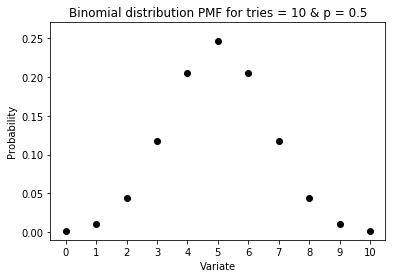

In [64]:
binom_pmf(10, 0.5)

#### 2.2 CDF

* **CDF**: **Cumulative density function**
* 變量 x 小於等於某個給定值的機率

In [65]:
print(stats.norm.cdf(0.0, loc=0.0, scale=1.0)) # 變量 x 小於等於 0 的機率

0.5


In [0]:
# 畫圖
def norm_cdf(mean=0.0, std=1.0):
    # 50 numbers between -3 \sigma and 3 \sigma
    x = sp.linspace(-3 * std, 3 * std, 50)
    # CDF at these values
    y = stats.norm.cdf(x, loc=mean, scale=std)

    plt.plot(x, y, color='black')
    plt.xlabel('Variate')
    plt.ylabel('Cumulative Probability')
    plt.title('CDF for Gaussian of mean = {0} & std. deviation = {1}'.format(mean, std))

    # plt.draw()
    plt.show()

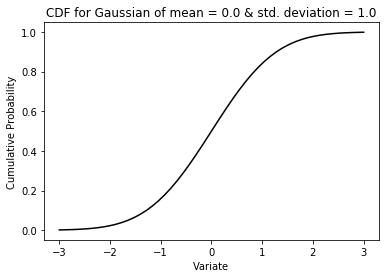

In [67]:
norm_cdf(0.0, 1.0)

#### 2.3 PPF
* **PPF**: **Percent point function (inverse cumulative function)**
* PPF 就是 inverse cumulative function
* 如果說 `y = f(x)` 是 CDF，給定 x 求出 y，那 PPF 就是給 y 反推求出 x

In [68]:
print(stats.norm.ppf(0.5, loc=0.0, scale=1.0))

0.0


In [0]:
# 畫圖
def norm_ppf(mean=0.0, std=1.0):
    # 100 numbers between 0 and 1.0 i.e., probabilities
    x = sp.linspace(0, 1.0, 100) # x 是 CDF 的值，因為是機率所以介於 0 ~ 1 之間
    # PPF at these values
    y = stats.norm.ppf(x, loc=mean, scale=std)

    plt.plot(x, y, color='black')
    plt.xlabel('Cumulative Probability')
    plt.ylabel('Variate')
    plt.title('PPF for Gaussian of mean = {0} & std. deviation = {1}'.format(mean, std))

    # plt.draw()
    plt.show()

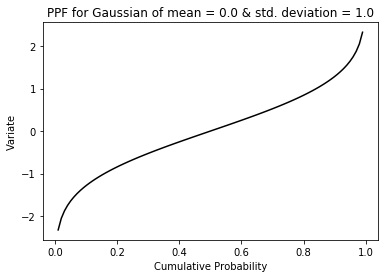

In [70]:
norm_ppf(0.0, 1.0)

#### 2.4 SF
* **SF**: **Survival function**
* 變量 x 比給定值大的機率
* `SF = 1 - CDF`

In [71]:
print(stats.norm.sf(0.0, loc=0.0, scale=1.0))

0.5


In [0]:
# 畫圖
def norm_sf(mean=0.5, std=1.0):
    # 50 numbers between -3\sigma and 3\sigma
    x = sp.linspace(-3 * std, 3 * std, 50)
    # SF at these values
    y = stats.norm.sf(x, loc=mean, scale=std)

    plt.plot(x, y, color='black')
    plt.xlabel('Variate')
    plt.ylabel('Probability')
    plt.title('SF for Gaussian of mean = {0} & std. deviation = {1}'.format(mean, std))

    # plt.draw()
    plt.show()

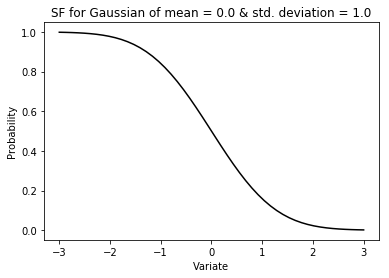

In [73]:
norm_sf(0.0, 1.0)

#### 2.5 ISF
* **ISF**: **Inverse survival function**
* 給定 survival function 的值來逆推回 variate 的值

In [74]:
print(stats.norm.isf(0.5, loc=0.0, scale=1.0))

0.0


In [0]:
# 畫圖
def norm_isf(mean=0.0, std=1.0):
    # 100 numbers between 0 and 1.0
    x = sp.linspace(0, 1.0, 100) # x 是 SF 的值，因為是機率所以介於 0 ~ 1 之間
    # ISF at these values
    y = stats.norm.isf(x, loc=mean, scale=std)

    plt.plot(x, y, color='black')
    plt.xlabel('Probability')
    plt.ylabel('Variate')
    plt.title('ISF for Gaussian of mean = {0} & std. deviation = {1}'.format(mean, std))

    # plt.draw()
    plt.show()

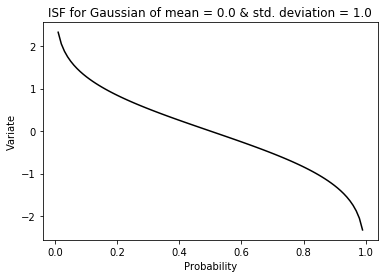

In [76]:
norm_isf(0.0, 1.0)

#### 2.6 Random variates
可以用 `rvs` 依照某個分部來產生隨機變數

In [77]:
# 100 random values from a normal distribution with mu = 0.0, sigma=1.0
print(stats.norm.rvs(loc=0.0, scale=1.0, size=100))
# 100 random values from a Poisson distribution with mu = 1.0
print(stats.poisson.rvs(1.0, size=100))

[ 1.28621758  1.51301459 -0.45331184  1.79354332  1.62919871  1.61459253
 -1.00216138  0.35345754  0.86949051 -0.38607005  0.48836416 -1.01971517
 -1.74464304 -1.04062228 -0.30019464  1.38772623  0.13589398  0.42573166
  0.17439042 -1.84602852 -0.32550189 -1.99604664 -0.69799686  0.43368862
  0.42217038 -0.05011368 -0.44103626 -0.62108625  0.74726081  0.91190364
 -0.49473499  0.51694232  0.89466615  1.26329831  0.33937382  0.5001766
 -0.19944338 -1.07838903  0.76137791 -1.45154678 -2.47418361 -0.46281631
  0.10865925  0.85400824  0.7572617  -0.32170571  0.98934628 -1.65107707
 -1.63693115 -0.5561239  -0.74458639 -0.79251    -0.15359265  1.22592122
  1.97786355 -0.48587669  0.62697235  0.12901171  0.55951363  0.41842753
  1.81759721 -1.55830821  0.76944542 -0.65841869  0.31023579  2.42263698
 -0.75854777  1.62579154  0.82363465 -1.95097718  1.14734291  0.57496522
 -0.07699221 -0.30601551  0.76566527 -0.01801009  1.23116449  2.06911095
  0.71618216 -0.44285883 -1.56162752 -0.04317107  0.

In [0]:
# 畫圖
# 每兩秒為一個時間間隔，產生 100 個依照 Poisson 分部的隨機數，mu = 1.69
# 也畫出 Poisson 分部的 Probability Mass Function (PMF), mu = 1.69
# Poisson 分布是不連續的，點跟點之間的線只是用平滑曲線連接起來
# Poisson distribution
# P(k events in interval) = \frac{\lambda^{k}e^{-\lambda}}{k!}
# 在固定時間間隔內發生了 k 次，\lambda 是在時間間隔內發生的平均次數，又可以叫做 event rate
import scipy as sp
from scipy import stats
from scipy import interpolate
from matplotlib import pyplot as plt

In [0]:
def simulate_poisson():
    # Mean is 1.69
    mu = 1.69
    sigma = sp.sqrt(mu) # Poisson 的標準差 \sigma_{k} = \sqrt(\lambda)
    mu_plus_sigma = mu + sigma

    # Draw random samples from the Poisson distribution, to simulate
    # the observed events per 2 second interval
    counts = stats.poisson.rvs(mu, size=100)

    # Bins for the histogram: only the last bin is closed on both
    # sides. We need one more bin than the maximum value of count, so
    # that the maximum values goes in its own bin instead of getting
    # added to the previous bin.
    # [0, 1), [1, 2), ...[max(counts), max(counts)+1]
    bins = range(0, max(counts) + 2)

    # Plot histogram
    plt.hist(counts, bins=bins, align='left', histtype='step', color='black')

    # Create Poisson distribution for given mu.
    x = range(0, 10)
    prob = stats.poisson.pmf(x, mu) * 100 # 產生 x 所對應的 Poisson 分佈的值
                                          # 因為產生了 100 個 Poisson 分佈的數值，所以這邊也要乘上 100
    # Plot the PMF
    plt.plot(x, prob, 'o', color='black')

    # Draw a smooth curve through the PMF
    l = sp.linspace(0, 11, 100) # x 值
    s = interpolate.spline(x, prob, l) # 用內插法來找出 y 值
    plt.plot(l, s, color='black')

    plt.xlabel('Number of counts per 2 seconds')
    plt.ylabel('Number of occurrences (Poisson)')

    # Interpolated probability at x = \mu + \sigma; for marking \sigma in the graph.
    xx = sp.searchsorted(l, mu_plus_sigma) - 1 # 找出 mu_plus_sigma 在 l 中會位在第幾個元素
    v = ((s[xx + 1] - s[xx]) / (l[xx + 1] - l[xx])) * (mu_plus_sigma - l[xx])
    v += s[xx]

    ax = plt.gca() # gca: get current axes
    # Reset axis range and ticks.
    ax.axis([-0.5, 10, 0, 40])
    ax.set_xticks(range(1, 10), minor=True)
    ax.set_yticks(range(0, 41, 8))
    ax.set_yticks(range(4, 41, 8), minor=True)

    # Draw arrow and then place an opaque box with \mu in it.
    # 在 (mu, 29) (mu, 13) 兩個座標畫一個箭頭
    ax.annotate('', xy=(mu, 29), xycoords='data', xytext=(mu, 13),
                textcoords='data', arrowprops=dict(arrowstyle='->',
                                                   connectionstyle='arc3'))
    bbox_props = dict(boxstyle='round', fc='w', ec='w')
    ax.text(mu, 21, r'$\mu$', va='center', ha='center',
            size=15, bbox=bbox_props)

    # Draw arrow and then place an opaque box with \sigma in it.
    ax.annotate('', xy=(mu, v), xytext=(mu_plus_sigma, v),
                arrowprops=dict(arrowstyle='<->', connectionstyle='arc3'))
    bbox_props = dict(boxstyle='round', fc='w', ec='w')
    ax.text(mu + (sigma / 2.0), v, r'$\sigma$', va='center', ha='center',
                  size=15, bbox=bbox_props)

    # Refresh plot and asve figure
    # plt.draw()
    # plt.savefig('simulate_poisson.png')
    plt.show()

AttributeError: ignored

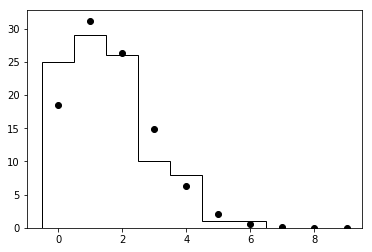

In [80]:
simulate_poisson()